In [4]:
import pandas as pd 
import numpy as np

Подготовка данных для обучения

In [5]:
train_df = pd.read_csv("data/train.csv")

In [131]:
clients_df = pd.read_csv('data/clients2.csv')

In [132]:
clients_df = clients_df.merge(train_df.loc[:,['client_id']], how='inner')

In [133]:
print((clients_df.age > 100).sum())
print((clients_df.age < 0).sum())

375
41


In [134]:
q25, q75 = np.percentile(clients_df.age, [25,75])
intr_qr = q75 - q25
max = q75 + intr_qr*1.5
min = q25 - intr_qr*1.5

In [135]:
print(min,max)

-3.5 96.5


In [136]:
min = 0

In [137]:
clients_df.loc[(clients_df.age > max) | (clients_df.age < min), 'age'] = np.nan

In [138]:
median_age = clients_df.age.median()
clients_df['age'] = clients_df['age'].fillna(median_age)

<AxesSubplot:>

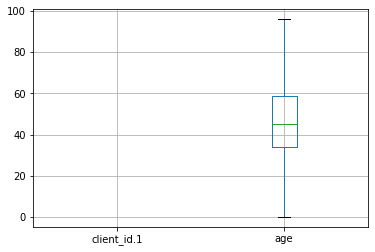

In [139]:
clients_df.boxplot()

In [140]:
clients_df.head()

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,U
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,F
2,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,F
3,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,U
4,000220a0a7,NaN,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,M


In [141]:
clients_df.gender = clients_df.gender.apply(lambda x: (x=='M') + 2*(x=='F'))

In [142]:
clients_df.head()

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,2
2,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,2
3,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0
4,000220a0a7,NaN,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,1


In [143]:
clients_df = clients_df.merge(train_df.client_id, how='inner')

In [144]:
clients_df['first_redeem_date'] = pd.to_datetime(clients_df['first_redeem_date'], errors='coerce')

In [145]:
clients_df['first_reedem_ts'] = clients_df.first_redeem_date.values.view('int64') / 1e9

In [146]:
clients_df.head()

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender,first_reedem_ts
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,1.515094e+09
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,2,1.492951e+09
2,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,2,1.535461e+09
3,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,1.515607e+09
4,000220a0a7,NaN,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,1,1.538665e+09


In [22]:
train_purch_df = pd.read_csv('data/train_purch.csv')

In [23]:
train_purch_df['transaction_datetime'] = pd.to_datetime(train_purch_df['transaction_datetime'], errors='coerce')

In [24]:
last_purch_ts = train_purch_df.groupby('client_id', as_index=False).transaction_datetime.max().rename(columns={'transaction_datetime': 'last_ts'})
last_purch_ts['last_ts'] = last_purch_ts.last_ts.values.view('int64')/(1e9)

In [25]:
last_purch_ts.head()

,client_id,last_ts
0,000012768d,1.552576e+09
1,000036f903,1.552819e+09
2,0001f552b0,1.552734e+09
3,00020e7b18,1.552651e+09
4,000220a0a7,1.552409e+09


In [26]:
clients_df.head()

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender,first_reedem_ts
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,1.515094e+09
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,2,1.492951e+09
2,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,2,1.535461e+09
3,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,1.515607e+09
4,000220a0a7,NaN,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,1,1.538665e+09


In [27]:
train_purch_df['ts'] = train_purch_df.transaction_datetime.values.view('int64')/(1e9)

In [28]:
train_purch_df = train_purch_df.merge(last_purch_ts, on='client_id', how='outer')

In [29]:
train_purch_df.head()

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red,ts,last_ts
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN,1.543648e+09,1.552576e+09
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN,1.543648e+09,1.552576e+09
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN,1.543648e+09,1.552576e+09
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN,1.543648e+09,1.552576e+09
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN,1.543648e+09,1.552576e+09


In [30]:
train_purch_without_last_purch = train_purch_df.loc[train_purch_df.ts < train_purch_df.last_ts]

In [31]:
pred_last_purch_ts = train_purch_without_last_purch.groupby('client_id', as_index=False).ts.max()

In [32]:
pred_last_purch_ts = pred_last_purch_ts.rename(columns={'ts': 'pred_last_ts'})

In [33]:
last_purch_ts.client_id.count()

140027

In [34]:
pred_last_purch_ts.client_id.count()

137324

In [35]:
purch_ts = last_purch_ts.merge(pred_last_purch_ts, how='outer')

In [36]:
purch_ts.pred_last_ts = purch_ts.pred_last_ts.fillna(purch_ts.last_ts)

In [37]:
purch_ts.loc[purch_ts.last_ts < purch_ts.pred_last_ts]

,client_id,last_ts,pred_last_ts


In [147]:
clients_df = clients_df.merge(purch_ts, how='inner')

In [148]:
clients_df.head()

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender,first_reedem_ts,last_ts,pred_last_ts
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,1.515094e+09,1.552576e+09,1.552040e+09
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,2,1.492951e+09,1.552819e+09,1.552127e+09
2,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,2,1.535461e+09,1.552734e+09,1.552559e+09
3,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,1.515607e+09,1.552651e+09,1.552550e+09
4,000220a0a7,NaN,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,1,1.538665e+09,1.552409e+09,1.552322e+09


In [149]:
clients_df['first_issue_date'] = pd.to_datetime(clients_df['first_issue_date'], errors='coerce')
clients_df['first_issue_ts'] = clients_df.first_issue_date.values.view('int64')/(1e9)

In [150]:
clients_df['days_own_bc'] = (clients_df.pred_last_ts - clients_df.first_issue_ts) / (24*60*60)

In [151]:
clients_df.head()

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender,first_reedem_ts,last_ts,pred_last_ts,first_issue_ts,days_own_bc
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,1.515094e+09,1.552576e+09,1.552040e+09,1.501948e+09,579.771701
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,2,1.492951e+09,1.552819e+09,1.552127e+09,1.491832e+09,697.855417
2,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,2,1.535461e+09,1.552734e+09,1.552559e+09,1.498850e+09,621.631053
3,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,1.515607e+09,1.552651e+09,1.552550e+09,1.511783e+09,471.840891
4,000220a0a7,NaN,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,1,1.538665e+09,1.552409e+09,1.552322e+09,1.512840e+09,456.968113


In [152]:
clients_df['days_from_last_purch'] = (clients_df.last_ts - clients_df.pred_last_ts) / (24*60*60)

In [153]:
clients_df.head()

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender,first_reedem_ts,last_ts,pred_last_ts,first_issue_ts,days_own_bc,days_from_last_purch
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,1.515094e+09,1.552576e+09,1.552040e+09,1.501948e+09,579.771701,6.201204
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,2,1.492951e+09,1.552819e+09,1.552127e+09,1.491832e+09,697.855417,8.002384
2,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,2,1.535461e+09,1.552734e+09,1.552559e+09,1.498850e+09,621.631053,2.017141
3,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,1.515607e+09,1.552651e+09,1.552550e+09,1.511783e+09,471.840891,1.174826
4,000220a0a7,NaN,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,1,1.538665e+09,1.552409e+09,1.552322e+09,1.512840e+09,456.968113,1.002986


In [116]:
clients_df.loc[clients_df.days_from_last_purch < 0]

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender,first_reedem_ts,last_ts,pred_last_ts,first_issue_ts,days_own_bc,days_from_last_purch


In [46]:
prods_data = pd.read_csv('data/products.csv')

In [47]:
prods_data.head()

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,0003020d3c,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.400,0,0
1,0003870676,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.680,0,0
2,0003ceaf69,c3d3a8e8c6,f2333c90fb,419bc5b424,f6148afbc0,271.0,f597581079,764e660dda,0.500,0,0
3,000701e093,ec62ce61e3,4202626fcb,88a515c084,48cf3d488f,172.0,54a90fe769,03c2d70bad,0.112,0,0
4,0007149564,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,63417fe1f3,f329130198,0.600,0,0


In [48]:
count_of_prds = train_purch_df.groupby('product_id', as_index=False).client_id.count()

In [49]:
count_of_prds = count_of_prds.merge(prods_data.loc[:,['product_id', 'is_own_trademark', 'is_alcohol']], on='product_id', how='inner')

In [50]:
count_of_prds = count_of_prds.rename(columns={'client_id':'purchases'})

In [51]:
count_of_prds.head()

,product_id,purchases,is_own_trademark,is_alcohol
0,0003870676,129,0,0
1,0003ceaf69,17,0,0
2,000701e093,52,0,0
3,0007149564,22,0,0
4,0008bf7786,1,0,1


In [52]:
train_purch_df.client_id.count()

15998952

In [53]:
train_purch_df = train_purch_df.merge(count_of_prds.loc[:, ['product_id', 'is_own_trademark', 'is_alcohol']], on='product_id', how='outer')

In [54]:
train_purch_df.client_id.count()

15998952

In [55]:
# is_purch_own_prds = train_purch_df.groupby('client_id', as_index=False).is_own_trademark.max()

In [56]:
# is_purch_own_prds.head()

,client_id,is_own_trademark
0,000012768d,1
1,000036f903,1
2,0001f552b0,1
3,00020e7b18,1
4,000220a0a7,1


In [154]:
# clients_df = clients_df.merge(is_purch_own_prds, how='outer')

In [155]:
# clients_df = clients_df.rename(columns={'is_own_trademark':'purched_own_tm'})

In [156]:
# clients_df.head()c

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender,first_reedem_ts,last_ts,pred_last_ts,first_issue_ts,days_own_bc,days_from_last_purch,purched_own_tm
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,1.515094e+09,1.552576e+09,1.552040e+09,1.501948e+09,579.771701,6.201204,1
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,2,1.492951e+09,1.552819e+09,1.552127e+09,1.491832e+09,697.855417,8.002384,1
2,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,2,1.535461e+09,1.552734e+09,1.552559e+09,1.498850e+09,621.631053,2.017141,1
3,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,1.515607e+09,1.552651e+09,1.552550e+09,1.511783e+09,471.840891,1.174826,1
4,000220a0a7,NaN,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,1,1.538665e+09,1.552409e+09,1.552322e+09,1.512840e+09,456.968113,1.002986,1


In [60]:
sum_of_purch = train_purch_df.loc[train_purch_df.ts == train_purch_df.last_ts].groupby('client_id', as_index=False).purchase_sum.mean()

In [61]:
sum_of_purch.head()

,client_id,purchase_sum
0,000012768d,419.00
1,000036f903,329.00
2,0001f552b0,511.84
3,00020e7b18,89.00
4,000220a0a7,731.98


In [157]:
clients_df = clients_df.merge(sum_of_purch, how='outer')

In [158]:
clients_df.isnull().sum()

client_id                    0
client_id.1             140027
first_issue_date             0
first_redeem_date        12354
age                          0
gender                       0
first_reedem_ts              0
last_ts                      0
pred_last_ts                 0
first_issue_ts               0
days_own_bc                  0
days_from_last_purch         0
purched_own_tm               0
purchase_sum                 0
dtype: int64

In [159]:
clients_df.head()

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender,first_reedem_ts,last_ts,pred_last_ts,first_issue_ts,days_own_bc,days_from_last_purch,purched_own_tm,purchase_sum
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,1.515094e+09,1.552576e+09,1.552040e+09,1.501948e+09,579.771701,6.201204,1,419.00
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,2,1.492951e+09,1.552819e+09,1.552127e+09,1.491832e+09,697.855417,8.002384,1,329.00
2,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,2,1.535461e+09,1.552734e+09,1.552559e+09,1.498850e+09,621.631053,2.017141,1,511.84
3,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,1.515607e+09,1.552651e+09,1.552550e+09,1.511783e+09,471.840891,1.174826,1,89.00
4,000220a0a7,NaN,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,1,1.538665e+09,1.552409e+09,1.552322e+09,1.512840e+09,456.968113,1.002986,1,731.98


In [65]:
train_purch_df.head()

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red,ts,last_ts,is_own_trademark,is_alcohol
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.00,54a4a11a29,9a80204f78,2.0,80.0,NaN,1.543648e+09,1.552576e+09,0,0
1,0027aac018,7be996a830,2018-12-08 14:46:14,1.0,0.0,-21.0,0.0,229.00,c72f410eb2,9a80204f78,1.0,36.0,40.0,1.544280e+09,1.552896e+09,0,0
2,00b19bc224,1001a6e6cb,2019-01-02 14:12:39,4.0,0.0,0.0,0.0,403.49,915aa2a84b,9a80204f78,1.0,40.0,NaN,1.546438e+09,1.552497e+09,0,0
3,00bb1bb4e8,c79c6f1815,2019-01-03 17:15:43,62.9,0.0,0.0,0.0,6893.00,5ac78637d2,9a80204f78,1.0,51.0,NaN,1.546536e+09,1.552801e+09,0,0
4,00e38f656d,c85b58be92,2019-03-15 14:37:08,32.5,0.0,-496.0,0.0,4480.00,2151d7db8f,9a80204f78,1.0,48.0,55.0,1.552661e+09,1.552661e+09,0,0


In [66]:
train_purch_df = train_purch_df.merge(clients_df.loc[:, ['client_id', 'first_reedem_ts']])

In [67]:
count_purch_before_fr = train_purch_df.loc[train_purch_df.ts < train_purch_df.first_reedem_ts].groupby('client_id', as_index=False).product_id.count()

In [68]:
count_purch_before_fr = count_purch_before_fr.rename(columns={'product_id': 'count_purch_before_fr'})

In [69]:
count_purch_after_fr = train_purch_df.loc[train_purch_df.ts >= train_purch_df.first_reedem_ts].groupby('client_id', as_index=False).product_id.count()

In [70]:
count_purch_after_fr = count_purch_after_fr.rename(columns={'product_id': 'count_purch_after_fr'})

In [160]:
clients_df = clients_df.merge(count_purch_before_fr, how='outer')
clients_df = clients_df.merge(count_purch_after_fr, how='outer')

In [122]:
clients_df.head()

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender,first_reedem_ts,last_ts,pred_last_ts,first_issue_ts,days_own_bc,days_from_last_purch,purched_own_tm,purchase_sum,count_purch_before_fr,count_purch_after_fr
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,1.515094e+09,1.552576e+09,1.552040e+09,1.501948e+09,579.771701,6.201204,1,419.00,NaN,52.0
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,2,1.492951e+09,1.552819e+09,1.552127e+09,1.491832e+09,697.855417,8.002384,1,329.00,NaN,162.0
2,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,2,1.535461e+09,1.552734e+09,1.552559e+09,1.498850e+09,621.631053,2.017141,1,511.84,NaN,86.0
3,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,1.515607e+09,1.552651e+09,1.552550e+09,1.511783e+09,471.840891,1.174826,1,89.00,NaN,272.0
4,000220a0a7,NaN,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,1,1.538665e+09,1.552409e+09,1.552322e+09,1.512840e+09,456.968113,1.002986,1,731.98,NaN,85.0


In [123]:
clients_df.isnull().sum()

client_id                     0
client_id.1              140027
first_issue_date              0
first_redeem_date         12354
age                           0
gender                        0
first_reedem_ts               0
last_ts                       0
pred_last_ts                  0
first_issue_ts                0
days_own_bc                   0
days_from_last_purch          0
purched_own_tm                0
purchase_sum                  0
count_purch_before_fr     98935
count_purch_after_fr      17600
dtype: int64

In [161]:
clients_df = clients_df.fillna(0)

In [76]:
# count_of_purchs = train_purch_df.groupby('client_id', as_index=False).ts.nunique()
# count_of_purchs = count_of_purchs.rename(columns={'ts': 'count_of_purchs'})

In [162]:
# clients_df = clients_df.merge(count_of_purchs, how='outer')

In [126]:
clients_df.head()

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender,first_reedem_ts,last_ts,pred_last_ts,first_issue_ts,days_own_bc,days_from_last_purch,purched_own_tm,purchase_sum,count_purch_before_fr,count_purch_after_fr,count_of_purchs
0,000012768d,0.0,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,1.515094e+09,1.552576e+09,1.552040e+09,1.501948e+09,579.771701,6.201204,1,419.00,0.0,52.0,4
1,000036f903,0.0,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,2,1.492951e+09,1.552819e+09,1.552127e+09,1.491832e+09,697.855417,8.002384,1,329.00,0.0,162.0,32
2,0001f552b0,0.0,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,2,1.535461e+09,1.552734e+09,1.552559e+09,1.498850e+09,621.631053,2.017141,1,511.84,0.0,86.0,15
3,00020e7b18,0.0,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,1.515607e+09,1.552651e+09,1.552550e+09,1.511783e+09,471.840891,1.174826,1,89.00,0.0,272.0,18
4,000220a0a7,0.0,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,1,1.538665e+09,1.552409e+09,1.552322e+09,1.512840e+09,456.968113,1.002986,1,731.98,0.0,85.0,15


In [79]:
transactions_data = train_purch_df.groupby('transaction_id', as_index=False).agg({'client_id':'max', 'purchase_sum':'mean', 'is_own_trademark':'max', 'is_alcohol':'max', 'express_points_spent':'mean'})

In [80]:
transactions_data.head()

,transaction_id,client_id,purchase_sum,is_own_trademark,is_alcohol,express_points_spent
0,0000033e06,42ea7275e0,247.00,1,0,0.0
1,00001bd343,44903524e0,285.94,1,0,0.0
2,0000349b45,1ad9152a20,441.00,1,0,0.0
3,0000360c79,89a3ee6090,320.00,1,0,0.0
4,000037ab38,823c39c6f5,149.00,0,0,0.0


In [81]:
client_info = transactions_data.groupby('client_id', as_index=False).agg({'is_own_trademark':'sum', 'is_alcohol':'sum', 'transaction_id':'count', 'purchase_sum':'sum', 'express_points_spent':'sum'})

In [82]:
client_info.head()

,client_id,is_own_trademark,is_alcohol,transaction_id,purchase_sum,express_points_spent
0,000012768d,3,0,4,2803.00,0.0
1,000036f903,12,1,32,9805.00,0.0
2,0001f552b0,7,0,15,6155.18,0.0
3,00020e7b18,15,0,18,25819.61,-30.0
4,000220a0a7,8,1,15,8606.57,0.0


In [83]:
client_info = client_info.rename(columns={'is_own_trademark':'count_own_trm', 'is_alcohol':'count_alc', 'transaction_id':'purchs_count', 'express_points_spent':'express_points_spent_sum'})

In [84]:
client_info['express_points_spent_mean'] = client_info.express_points_spent_sum / client_info.purchs_count

In [86]:
client_info['purchase_sum_mean'] = client_info.purchase_sum / client_info.purchs_count

In [87]:
client_info.head()

,client_id,count_own_trm,count_alc,purchs_count,purchase_sum,express_points_spent_sum,express_points_spent_mean,purchase_sum_mean
0,000012768d,3,0,4,2803.00,0.0,0.000000,700.750000
1,000036f903,12,1,32,9805.00,0.0,0.000000,306.406250
2,0001f552b0,7,0,15,6155.18,0.0,0.000000,410.345333
3,00020e7b18,15,0,18,25819.61,-30.0,-1.666667,1434.422778
4,000220a0a7,8,1,15,8606.57,0.0,0.000000,573.771333


In [165]:
clients_df = clients_df.merge(client_info, on='client_id', how='inner')

In [166]:
clients_df.client_id.count()

140027

In [170]:
# clients_df = clients_df.drop(columns=['client_id.1', 'purchase_sum_x']).rename(columns={'purchase_sum_y':'purchase_sum'})

In [171]:
clients_df.head()

,client_id,first_issue_date,first_redeem_date,age,gender,first_reedem_ts,last_ts,pred_last_ts,first_issue_ts,days_own_bc,...,count_purch_before_fr,count_purch_after_fr,count_of_purchs,count_own_trm,count_alc,purchs_count,purchase_sum,express_points_spent_sum,express_points_spent_mean,purchase_sum_mean
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,1.515094e+09,1.552576e+09,1.552040e+09,1.501948e+09,579.771701,...,0.0,52.0,4,3,0,4,2803.00,0.0,0.000000,700.750000
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,2,1.492951e+09,1.552819e+09,1.552127e+09,1.491832e+09,697.855417,...,0.0,162.0,32,12,1,32,9805.00,0.0,0.000000,306.406250
2,0001f552b0,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,2,1.535461e+09,1.552734e+09,1.552559e+09,1.498850e+09,621.631053,...,0.0,86.0,15,7,0,15,6155.18,0.0,0.000000,410.345333
3,00020e7b18,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,1.515607e+09,1.552651e+09,1.552550e+09,1.511783e+09,471.840891,...,0.0,272.0,18,15,0,18,25819.61,-30.0,-1.666667,1434.422778
4,000220a0a7,2017-12-09 17:26:20,2018-10-04 14:59:29,45.0,1,1.538665e+09,1.552409e+09,1.552322e+09,1.512840e+09,456.968113,...,0.0,85.0,15,8,1,15,8606.57,0.0,0.000000,573.771333


In [174]:
train_df = train_df.merge(clients_df.drop(columns=['first_issue_date', 'first_redeem_date']), on='client_id', how='inner')

In [176]:
list(train_df)

['client_id',
 'treatment_flg',
 'purchased',
 'age',
 'gender',
 'first_reedem_ts',
 'last_ts',
 'pred_last_ts',
 'first_issue_ts',
 'days_own_bc',
 'days_from_last_purch',
 'purched_own_tm',
 'count_purch_before_fr',
 'count_purch_after_fr',
 'count_of_purchs',
 'count_own_trm',
 'count_alc',
 'purchs_count',
 'purchase_sum',
 'express_points_spent_sum',
 'express_points_spent_mean',
 'purchase_sum_mean']

Создаем и обучаем модель

In [78]:
import torch
import numpy as np
from torch import nn 

In [79]:
train_prop = 0.75
size = train_df.client_id.count()
train_data = train_df.loc[int(size*train_prop):]
val_data = train_df.loc[:int(size*train_prop)]

In [80]:
train_X = train_data.drop(columns=['client_id', 'purchased', 'treatment_flg'])
train_y = train_data.purchased

In [81]:
train_X = torch.FloatTensor(train_X.values)
train_y = torch.FloatTensor(train_y.values).reshape(-1, 1)

In [82]:
train_X

tensor([[131.8745,   1.7619, 119.9800],
        [509.2083,   2.5361, 938.0000],
        [428.1188,   5.9147, 139.9700],
        ...,
        [378.9128,   6.0179, 496.0000],
        [615.5471,   2.9421,  32.0000],
        [659.9639,   1.9716, 526.3900]])

Первый столбец будет отвечать за наличие связи с клиентов

In [83]:
in_features = train_X.shape[1]
out_features = 1
train_size = train_X.shape[0]

In [84]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [85]:
import matplotlib.pyplot as plt

In [86]:
batch_size = 512
epochs = 5
learning_rate = 1e-3

In [87]:
model = nn.Sequential(
    nn.Linear(in_features, 16),
    nn.ReLU(),
    nn.Linear(16,8),
    nn.ReLU(),
    nn.Linear(8,1)
)
model.to(device)

Sequential(
  (0): Linear(in_features=3, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
)

In [88]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [89]:
history = []
for it in range(epochs):
    for batch_ind in range(0,train_size//batch_size):
        
        X_batch = train_X[batch_ind*batch_size:(batch_ind+1)*batch_size].to(device)
        y_batch = train_y[batch_ind*batch_size:(batch_ind+1)*batch_size].to(device)
        
        logits = model(train_X.to(device))
        loss = criterion(logits, train_y.to(device))
        history.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(loss.item())

12.931936264038086
5.7041168212890625
3.8066368103027344
2.8534774780273438
2.1996335983276367


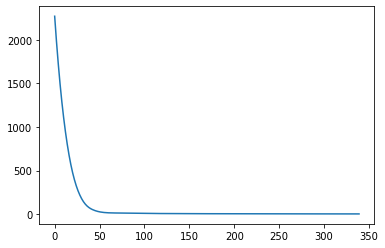

In [90]:
plt.plot(history)

In [91]:
model.to('cpu')

Sequential(
  (0): Linear(in_features=3, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
)

In [92]:
val_X = val_data.drop(columns=['client_id', 'purchased', 'treatment_flg'])
val_y = val_data.purchased
val_X = torch.FloatTensor(val_X.values)
val_y = torch.FloatTensor(val_y.values).reshape(-1, 1)

In [93]:
with torch.no_grad():
    probs = model(val_X)


In [94]:
probs

tensor([[ 2.6059],
        [ 2.3060],
        [ 1.4663],
        ...,
        [-0.0454],
        [-0.1482],
        [ 0.3084]])

In [95]:
from sklearn.metrics import roc_auc_score

In [96]:
2*roc_auc_score(val_y, probs) - 1

-0.01843426965357331

Подготовка тренировочных данных 

In [97]:
test_df = pd.read_csv("data/test.csv")

In [98]:
clients_df = pd.read_csv('data/clients2.csv')
clients_df = clients_df.merge(test_df.loc[:,['client_id']], how='inner')

In [99]:
test_df = test_df.merge(clients_df.loc[:,['client_id', 'age', 'gender']])

In [100]:
test_df.gender = test_df.gender.apply(lambda x: (x=='M') + 2*(x=='F'))

In [101]:
test_purch_df = pd.read_csv('data/test_purch.csv')

In [102]:
test_purch_df['transaction_datetime'] = pd.to_datetime(test_purch_df['transaction_datetime'], errors='coerce')

In [103]:
last_purch_ts = test_purch_df.groupby('client_id', as_index=False).transaction_datetime.max().rename(columns={'transaction_datetime': 'last_ts'})
last_purch_ts['last_ts'] = last_purch_ts.last_ts.values.view('int64')/(1e9)

In [104]:
test_purch_df['ts'] = test_purch_df.transaction_datetime.values.view('int64')/(1e9)

In [105]:
test_purch_df = test_purch_df.merge(last_purch_ts, on='client_id', how='outer')

In [106]:
test_purch_without_last_purch = test_purch_df.loc[test_purch_df.ts < test_purch_df.last_ts]

In [107]:
pred_last_purch_ts = test_purch_without_last_purch.groupby('client_id', as_index=False).ts.max()

In [108]:
pred_last_purch_ts = pred_last_purch_ts.rename(columns={'ts': 'pred_last_ts'})

In [109]:
purch_ts = last_purch_ts.merge(pred_last_purch_ts, how='outer')

In [110]:
purch_ts.pred_last_ts = purch_ts.pred_last_ts.fillna(purch_ts.last_ts)

In [111]:
purch_ts.loc[purch_ts.last_ts < purch_ts.pred_last_ts]

,client_id,last_ts,pred_last_ts


In [112]:
clients_df = clients_df.merge(purch_ts, how='outer')

In [113]:
clients_df['first_issue_date'] = pd.to_datetime(clients_df['first_issue_date'], errors='coerce')
clients_df['first_issue_ts'] = clients_df.first_issue_date.values.view('int64')/(1e9)

In [114]:
clients_df['days_own_bc'] = (clients_df.pred_last_ts - clients_df.first_issue_ts) / (24*60*60)

In [115]:
clients_df['days_from_last_purch'] = (clients_df.last_ts - clients_df.pred_last_ts) / (24*60*60)

In [116]:
clients_df.loc[clients_df.days_from_last_purch < 0]

,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender,last_ts,pred_last_ts,first_issue_ts,days_own_bc,days_from_last_purch


In [117]:
prods_data = pd.read_csv('data/products.csv')

In [118]:
count_of_prds = test_purch_df.groupby('product_id', as_index=False).client_id.count()

In [119]:
count_of_prds = count_of_prds.merge(prods_data.loc[:,['product_id', 'is_own_trademark']], on='product_id', how='inner')

In [120]:
count_of_prds = count_of_prds.rename(columns={'client_id':'purchases'})

In [121]:
test_purch_df = test_purch_df.merge(count_of_prds.loc[:, ['product_id', 'is_own_trademark']], on='product_id', how='outer')

In [122]:
is_purch_own_prds = test_purch_df.groupby('client_id', as_index=False).is_own_trademark.max()

In [123]:
clients_df = clients_df.merge(is_purch_own_prds, how='outer')

In [124]:
clients_df = clients_df.rename(columns={'is_own_trademark':'purched_own_tm'})

In [125]:
sum_of_purch = test_purch_df.loc[test_purch_df.ts == test_purch_df.last_ts].groupby('client_id', as_index=False).purchase_sum.mean()

In [126]:
clients_df = clients_df.merge(sum_of_purch, how='outer')

In [127]:
clients_df.isnull().sum()

client_id                   0
client_id.1             60012
first_issue_date            0
first_redeem_date        5192
age                         0
gender                      0
last_ts                     0
pred_last_ts                0
first_issue_ts              0
days_own_bc                 0
days_from_last_purch        0
purched_own_tm              0
purchase_sum                0
dtype: int64

In [128]:
test_df = test_df.merge(clients_df.loc[:,['client_id', 'days_own_bc', 'days_from_last_purch', 'purchase_sum']])

In [129]:
test_df.head()

,client_id,age,gender,days_own_bc,days_from_last_purch,purchase_sum
0,a9a604ed6e,36,2,151.622685,23.917280,663.86
1,ebd7360016,63,2,619.862153,1.907558,47.00
2,908cd9b8e8,49,2,334.920949,6.038391,249.99
3,dceb8ce861,46,0,509.927801,5.040521,1585.73
4,f4f0ac6b06,119,0,247.880023,2.996065,828.00


In [130]:
test_X = test_df.drop(columns=['client_id'])
test_X = torch.FloatTensor(test_X.values)

In [131]:
test_X.shape

torch.Size([60012, 5])

In [132]:
with torch.no_grad():
    probs_test = model(test_X)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (60012x5 and 3x16)

In [ ]:
probs_test

tensor([[ 0.3843],
        [ 0.6567],
        [ 0.2814],
        ...,
        [ 0.2890],
        [-0.0119],
        [ 0.8951]])

In [ ]:
probs_test = np.asarray(probs_test).reshape(-1)

In [ ]:
probs_test

array([ 0.38432157,  0.65669525,  0.2814082 , ...,  0.2890309 ,
       -0.0119319 ,  0.89513624], dtype=float32)

In [ ]:
out_data = pd.DataFrame(test_df.client_id)

In [ ]:
out_data['pred'] = probs_test

In [ ]:
out_data

,client_id,pred
0,a9a604ed6e,0.384322
1,ebd7360016,0.656695
2,908cd9b8e8,0.281408
3,dceb8ce861,0.675891
4,f4f0ac6b06,1.495487
...,...,...
60007,4762fb04c5,0.288775
60008,533d1516e7,0.326652
60009,c93b21a707,0.289031
60010,3fe0668de5,-0.011932


In [ ]:
out_data.to_csv('results.csv', index=False)